## Mini Project III

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans

In [140]:
customerInformation = pd.read_csv('twm_customer.csv',sep=";")
accountInformation = pd.read_csv('twm_accounts.csv', sep=";")
transactionsInformation = pd.read_csv('twm_transactions.csv', sep=";")

In [143]:
transactionsInformation

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


In [176]:
transactionsDataFrame = transactionsInformation[['acct_nbr',"tran_amt"]].groupby('acct_nbr').mean().sort_values(by='tran_amt')

In [177]:
transactionsDataFrame['average'] = transactionsDataFrame.groupby('acct_nbr').mean()

In [163]:
transactionsDataFrame['numberOfTransactions'] = transactionsInformation.acct_nbr.value_counts()

In [178]:
transactionsDataFrame

,tran_amt,average
acct_nbr,,
4561143213625620,-351.851852,-351.851852
4561143213625690,-328.571429,-328.571429
4561143213628320,-293.103448,-293.103448
4561143213629170,-261.538462,-261.538462
4561143213633110,-225.000000,-225.000000
...,...,...
4561143213631330,1675.890000,1675.890000
4561143213631690,1749.600000,1749.600000
4561143213631460,2814.610000,2814.610000


In [170]:
transactionsDataFrame.sort_values(by=["tran_amt","numberOfTransactions"], ascending=[False,False])

,tran_amt,numberOfTransactions
acct_nbr,,
4561143213632370,8735.140000,1
4561143213626190,3905.040000,1
4561143213631460,2814.610000,1
4561143213631690,1749.600000,1
4561143213631330,1675.890000,1
...,...,...
4561143213633110,-225.000000,12
4561143213629170,-261.538462,26
4561143213628320,-293.103448,29


In [149]:
transactionsInformation.acct_nbr.value_counts()

4561143213630020    155
4561143213626830    141
4561143213627770    137
4561143213632490    131
4561143213629780    112
                   ... 
4561143213631330      1
4561143213626190      1
4561143213631460      1
4561143213631690      1
4561143213632370      1
Name: acct_nbr, Length: 1398, dtype: int64

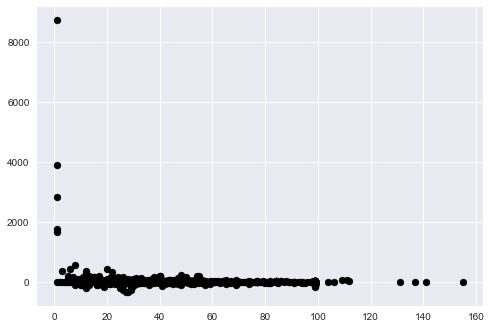

In [173]:
plt.scatter(transactionsDataFrame['numberOfTransactions'],transactionsDataFrame['average'],c='black')

In [105]:
def plot_distortions(X,max_clusters=10):
    distortions = []
    for i in range(1,max_clusters+1):
        km = KMeans(n_clusters=i,init="k-means++",n_init=10,random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    
    plt.plot(range(1,max_clusters+1),distortions,marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortions')
    plt.show()

In [93]:
customerAge_Income = customerInformation[['age','income']]

C:\Users\Jimmy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


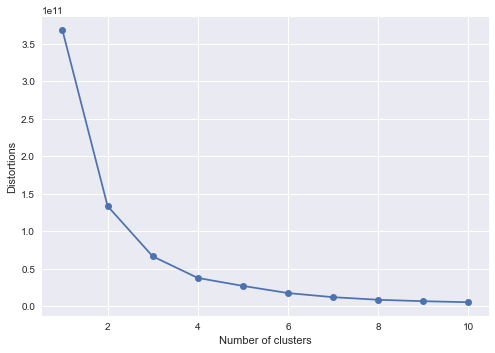

In [108]:
plot_distortions(customerAge_Income,10)

In [125]:
def plot_clusters(X,y_res,plt_cluster_centers=False):
    X_centroids = []
    Y_centroids = []


    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,y,s=50,marker='s',label=f'cluster{cluster}')
    
    if plt_cluster_centers:
        plt.scatter(X_centroids,Y_centroids,marker='*',c='red',s=250,label='centroids')

    plt.legend()
    plt.grid()
    plt.show()


In [128]:
km = KMeans(n_clusters=3,n_init=10,random_state=0)
y_km = km.fit_predict(customerAge_Income)

In [135]:
km.fit(customerAge_Income)
y_kmeans = km.predict(customerAge_Income)

In [ ]:
plt.style.use('seaborn')

In [ ]:
customerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
50,1362729,0,13,5,0,M,1,,Bruce ...,Kraus ...,1223,Vine ...,10104,New York City,NY
51,1362668,0,13,5,0,M,1,,Chiman ...,Boyd ...,16437,37th ...,90750,Long Beach,CA
91,1362523,0,13,5,0,F,1,,Julie ...,Morton ...,8369,Madison ...,90061,Los Angeles,CA
202,1362496,0,13,2,0,M,1,,Douglas ...,McMillen ...,2968,Leek ...,77058,Houston,TX
265,1363064,0,13,5,0,F,1,,Isabel ...,Gold ...,7879,Third ...,14622,Rochester,NY


In [ ]:
customerInformation = customerInformation.sort_values(by=['age','income'])

<BarContainer object of 747 artists>

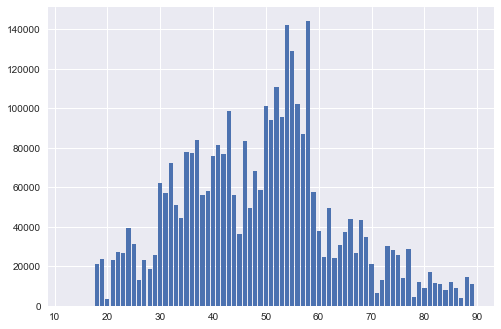

In [ ]:
plt.bar(customerInformation['age'],customerInformation['income'])

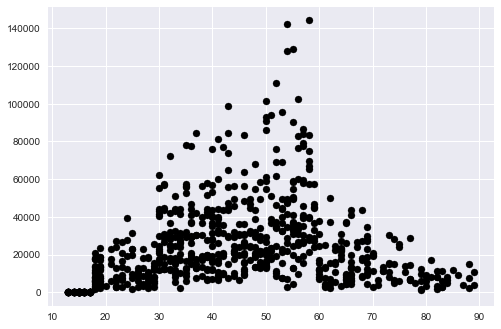

In [ ]:
plt.scatter(customerInformation['age'],customerInformation['income'],c='black')

In [ ]:
plt.bar(customerInformation['age'],customerInformation['income'])

In [ ]:
accountCustomerInformation = customerInformation.merge(accountInformation,on="cust_id")

In [ ]:
accountCustomerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,postal_code,city_name,state_code,acct_nbr,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,4561143213624870,CC,Y,8.8.1995,NaN,0.00,1548.23
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,13624873,SV,N,27.6.1994,25.8.1995,651.73,12.89
2,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,13624872,CK,Y,12.1.1995,NaN,2781.07,1401.21
3,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,90024,Los Angeles,CA,4561143213631600,CC,Y,12.10.1988,NaN,657.46,286.69
4,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,90024,Los Angeles,CA,13631603,SV,Y,9.5.1988,NaN,113.04,122.54


In [ ]:
accountCustomerInformation.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,...,postal_code,city_name,state_code,acct_nbr,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,4561143213624870,CC,Y,8.8.1995,NaN,0.00,1548.23
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,13624873,SV,N,27.6.1994,25.8.1995,651.73,12.89
2,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,...,90159,Los Angeles,CA,13624872,CK,Y,12.1.1995,NaN,2781.07,1401.21
3,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,90024,Los Angeles,CA,4561143213631600,CC,Y,12.10.1988,NaN,657.46,286.69
4,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,...,90024,Los Angeles,CA,13631603,SV,Y,9.5.1988,NaN,113.04,122.54
